Projek Bengkel Koding : Switzerland

Nama : Nicholaus Verdhy Putranto

Nim : A11.2020.12447

Kelas : BKDS07

# Load DataSet

In [1]:
#Import library 
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt

In [2]:
#load dataset
dir = "cleveland.data"

In [3]:
#melakukan encoding pada dataset
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
    
#membuatnya kedalam data frame
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10)))

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [4]:
# Melihat informasti tipe data yang ada serta jumlah data yang ada setiap vaiabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [5]:
#Menghapus kolom 75 berisikan name
df.drop(75,axis=1,inplace=True)

#menhapus kolom 0 karena itu index data
df.drop(0,axis=1,inplace=True)

In [6]:
#mengubah tipe data kolom object menjadi float
df = df.astype(float)

In [7]:
#melihat informasi tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

# Validasi Data

In [8]:
df.replace(-9.0,np.nan, inplace=True)

In [9]:
#melihat missing value
df.isna().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [10]:
df.isna().sum().sum()

5992

In [11]:
#sekarang mari kita lihat 5 data teratas pada data set. kita gunakan pd.set_option untuk melihat full kolom
pd.set_option("Display.max_column",None)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,233.0,NaN,50.0,20.0,1.0,NaN,1.0,2.0,2.0,3.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,145.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,2.0,16.0,81.0,0.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,286.0,NaN,40.0,40.0,0.0,NaN,1.0,2.0,3.0,5.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,160.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,5.0,81.0,2.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,229.0,NaN,20.0,35.0,0.0,NaN,1.0,2.0,2.0,19.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,120.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,20.0,81.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,250.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,2.0,13.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,130.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,4.0,81.0,0.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,204.0,NaN,0.0,0.0,0.0,NaN,1.0,2.0,2.0,7.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,NaN,9.0,172.0,71.0,160.0,74.0,130.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,18.0,81.0,0.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


# Menentukan Fitur

Sesuai dengan sumber penjjelasan datasetnya, fitur yang dugunakan ada pada kolom yang ada pada lokasi [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]. Maka dari itu kita melakukan pengambilan kolom tersebut

In [12]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0.0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1.0
279,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0.0
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2.0


Setelah itu, kita mengganti kolom  nama sesuai dengan arahan dari sumber data set. kita gunakan .rename untuk menggantinya. Sebelumnya kita membuat dictionary yang nantinya kita gunakan untuk mengganti nama kolom

Agar tidak menghilangkan data awal / mentah. Mari kita copy dataframenya kedalam df_selected_copy. Hal ini untuk mengantisipasi agar data asli tidak terkontaminasi dengan data yang telah di prosesing

In [13]:
df_selected_copy = df_selected.copy()

In [14]:
#buat dictionary nama
nama_kolom = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [15]:
#mengubah nama kolom .rename
df_selected_copy.rename(columns=nama_kolom,inplace=True)

In [16]:
df_selected_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# Data Cleansing

Memasuki tahap berikutnya yaitu data cleansing. Data cleansing ini akan berguna untuk menghilangkan missing values pada dataset

In [17]:
# melihat missing value pada kolom
nilai_hilang = df_selected_copy.isnull().sum()
df_selected_copy.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

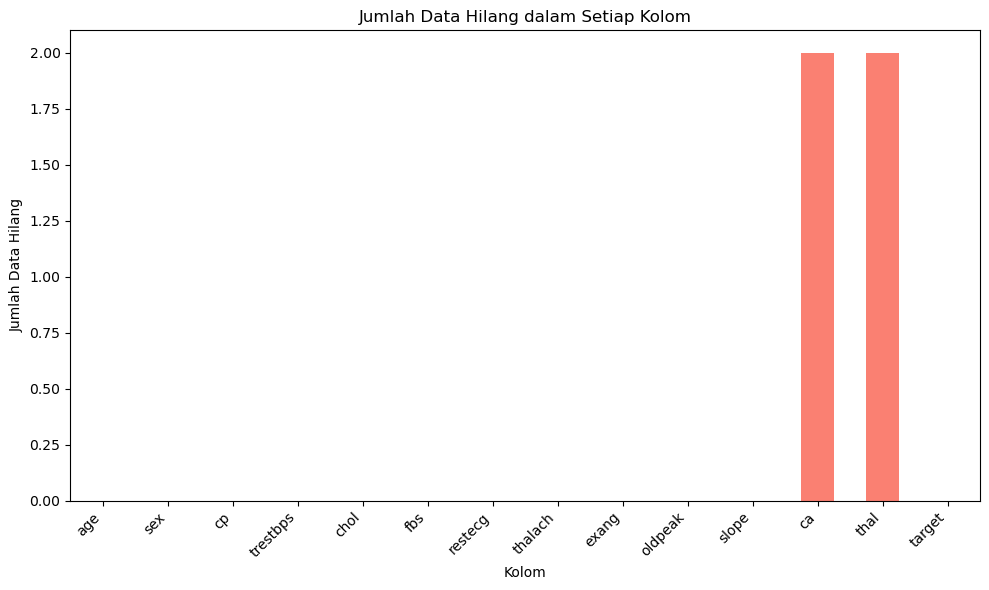

In [18]:
# Plotting grafik jumlah data hilang
plt.figure(figsize=(10, 6))
nilai_hilang.plot(kind='bar', color='salmon')
plt.title('Jumlah Data Hilang dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Hilang')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
df_selected_copy.shape

(282, 14)

In [20]:
# Menghitung persentase data hilang untuk setiap kolom
percentage_missing = (df_selected_copy.isnull().sum() / len(df_selected_copy)) * 100

# Menampilkan persentase data hilang untuk setiap kolom
print(round(percentage_missing,2))

age         0.00
sex         0.00
cp          0.00
trestbps    0.00
chol        0.00
fbs         0.00
restecg     0.00
thalach     0.00
exang       0.00
oldpeak     0.00
slope       0.00
ca          0.71
thal        0.71
target      0.00
dtype: float64


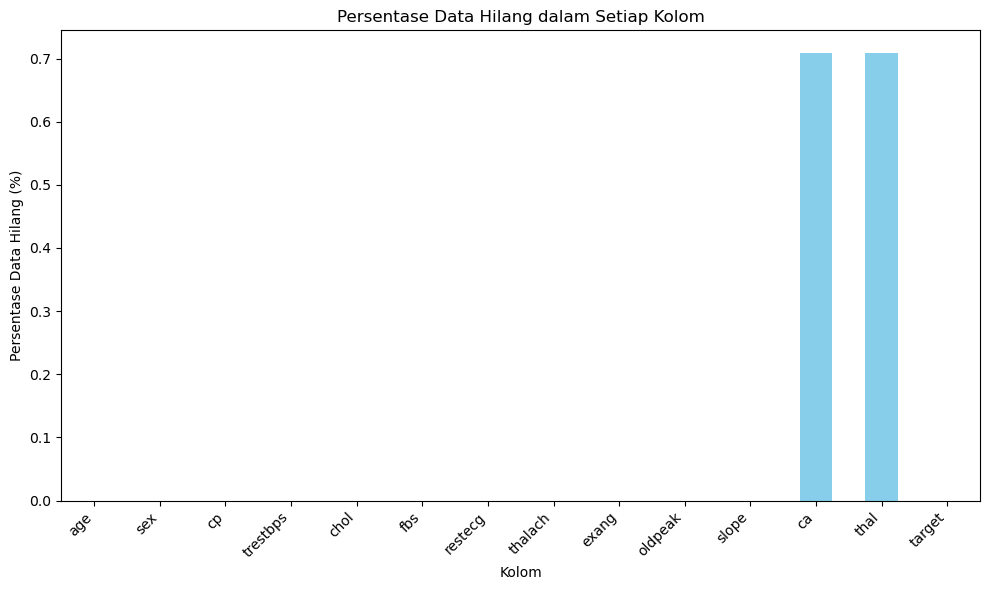

In [21]:
# Plotting grafik persentase data hilang
plt.figure(figsize=(10, 6))
percentage_missing.plot(kind='bar', color='skyblue')
plt.title('Persentase Data Hilang dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Data Hilang (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#menghapus fitur yang mnissing valuenyta banyak
df_selected_copy.drop(["ca","fbs"],axis=1, inplace=True)

In [23]:
df_selected_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        2
target      0
dtype: int64

In [24]:
df_selected_copy.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,280.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,1.014184,149.765957,0.326241,1.026950,1.585106,4.678571,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.998118,22.923869,0.469670,1.138825,0.609700,1.939101,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,133.250000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,2.000000,153.500000,0.000000,0.800000,2.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,2.000000,165.750000,1.000000,1.600000,2.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,3.000000,7.000000,4.000000


In [25]:
#mengisi missing value dengan mean()
df_selected_copy.fillna(df_selected_copy.mean(),inplace=True)
df_selected_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [26]:
df_selected_copy.info()
#ubah tipe kolom df["namakolom"] = df["namaklolom"].astype(jenisdata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   restecg   282 non-null    float64
 6   thalach   282 non-null    float64
 7   exang     282 non-null    float64
 8   oldpeak   282 non-null    float64
 9   slope     282 non-null    float64
 10  thal      282 non-null    float64
 11  target    282 non-null    float64
dtypes: float64(12)
memory usage: 26.6 KB


In [27]:
df_selected_copy.duplicated().sum()

0

In [28]:
# df_duplikat = df_selected_copy.duplicated()
# df_selected_copy[df_selected_copy.duplicated(keep=False)] duplikasi data
# df_selected_copy.drop_duplicates(inplace=True)

In [29]:
df_selected_copy["chol"].value_counts()

204.0    6
234.0    6
269.0    5
197.0    5
254.0    5
        ..
182.0    1
252.0    1
141.0    1
164.0    1
278.0    1
Name: chol, Length: 145, dtype: int64

# KJorelasi antar Data

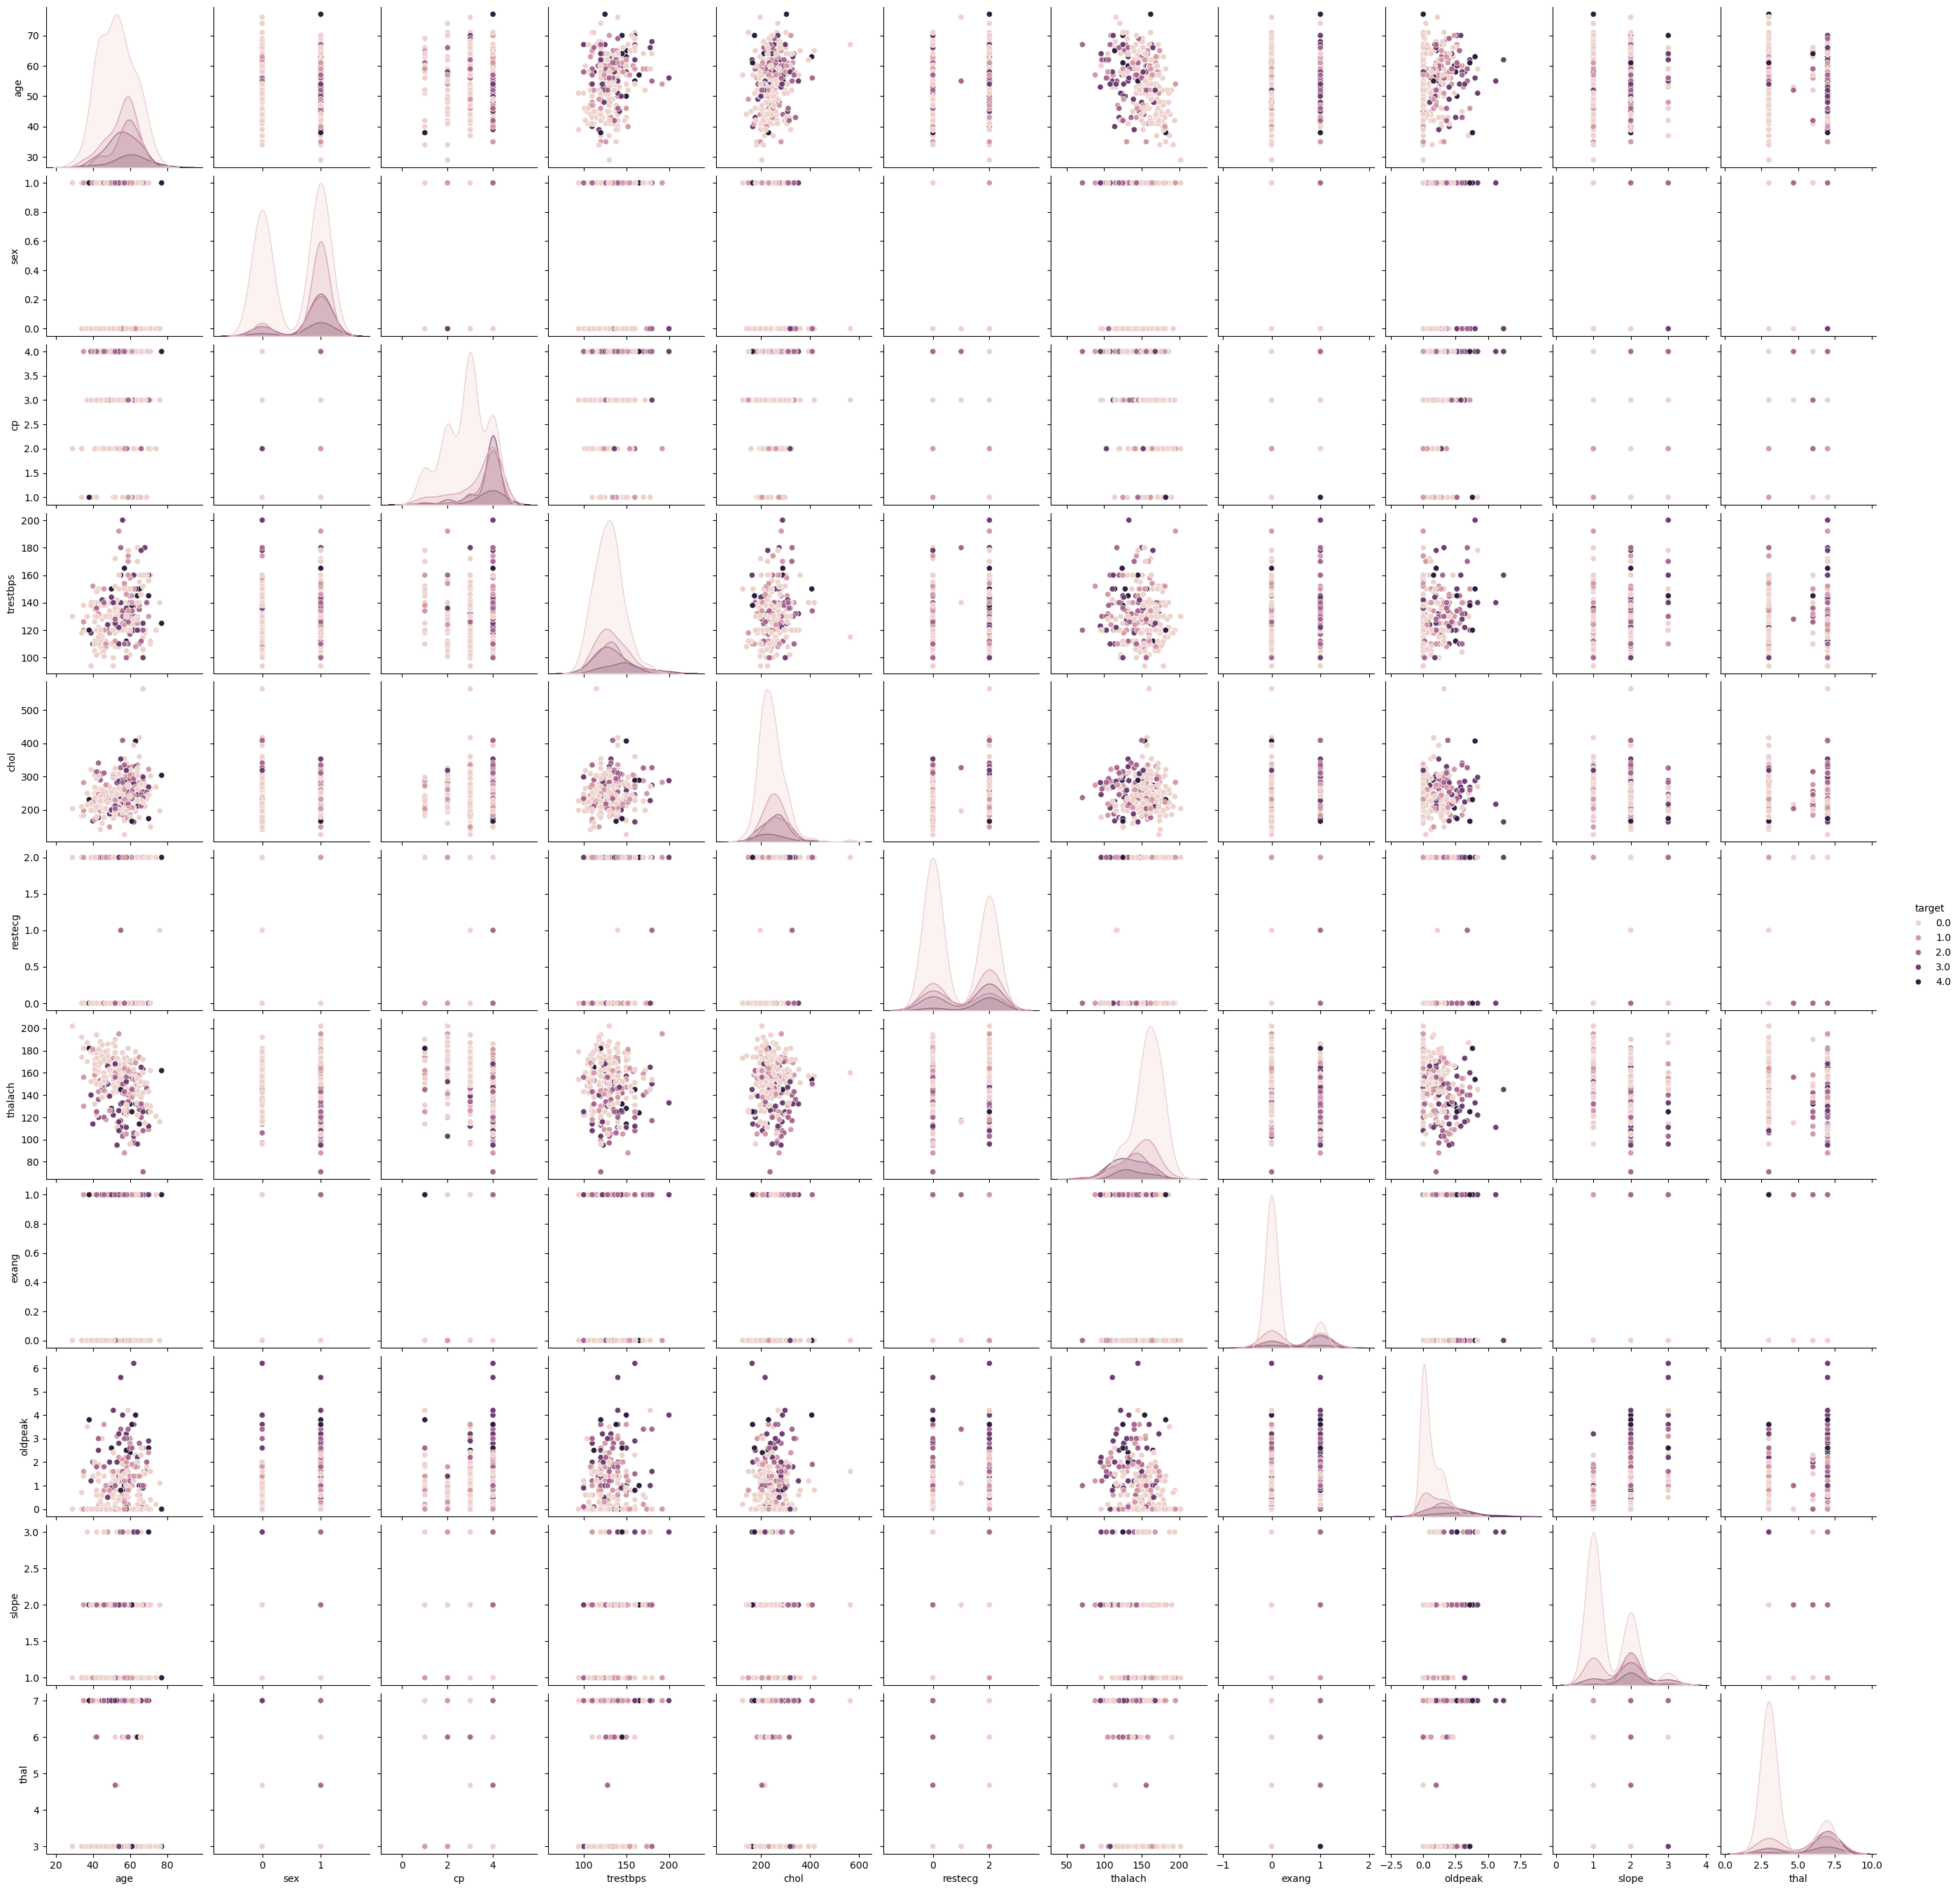

In [30]:
#menampilkan pair plot
import seaborn as sns

# Membuat pair plot menggunakan seaborn
sns.pairplot(df_selected_copy, hue='target')
plt.show()

<Axes: >

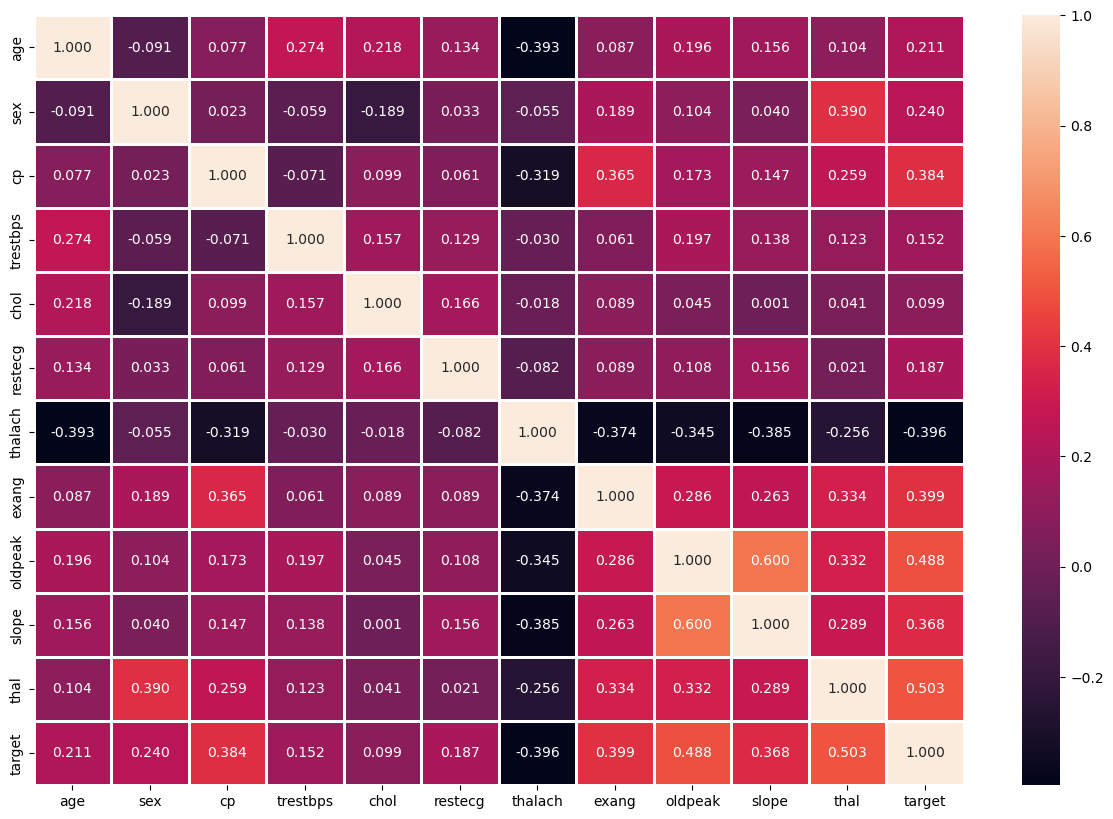

In [31]:
#mendapatkan nilai korelas
korelasi_matrix = df_selected_copy.corr()

#membuat plot
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(korelasi_matrix,annot=True,linewidths=1.0, fmt=".3f")

In [32]:
#menghapus chol karena 0 smua
df_selected_copy.drop(["chol"],axis=1,inplace=True)

<Axes: >

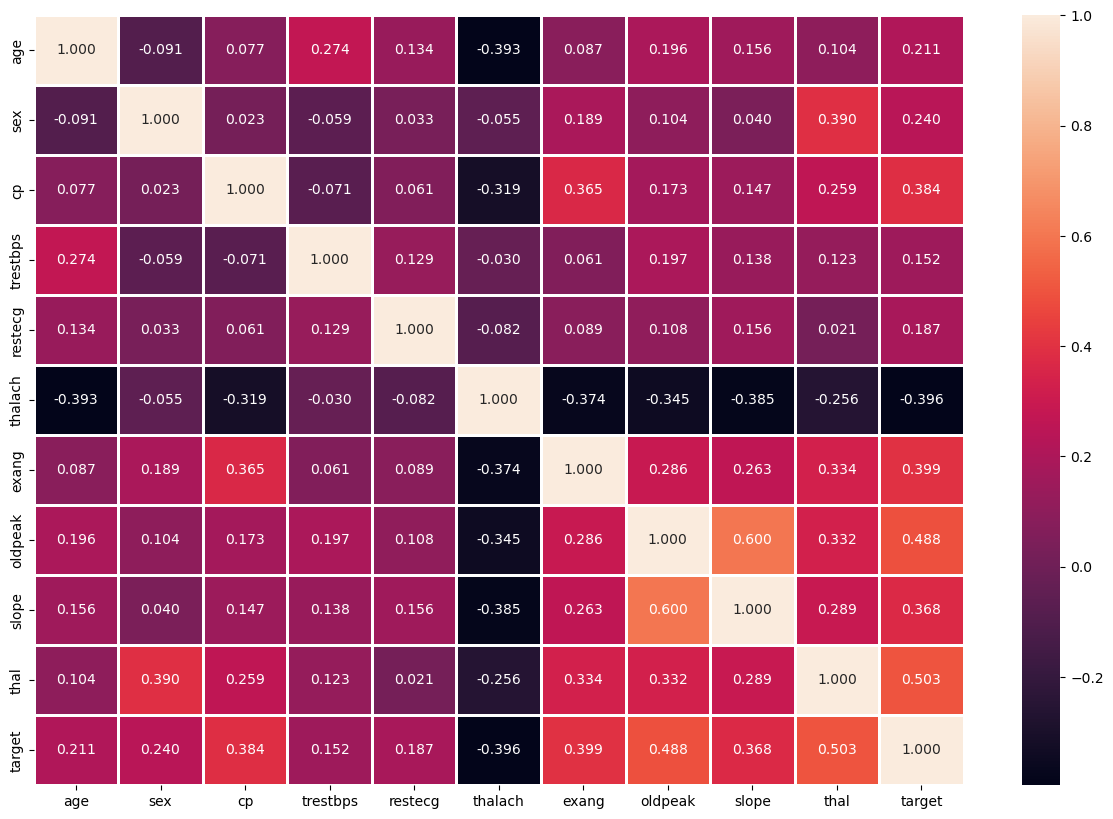

In [33]:
#mendapatkan nilai korelas
korelasi_matrix = df_selected_copy.corr()

#membuat plot
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(korelasi_matrix,annot=True,linewidths=1.0, fmt=".3f")

# Konstruksi Data

Mari kita melakukan pemisahan terhadap dataset kedalam variabel bebas (x) dan variabel terikat(y). Untuk tipe data sudah sesuai dengan kebutuhan yaitu float

In [34]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   restecg   282 non-null    float64
 5   thalach   282 non-null    float64
 6   exang     282 non-null    float64
 7   oldpeak   282 non-null    float64
 8   slope     282 non-null    float64
 9   thal      282 non-null    float64
 10  target    282 non-null    float64
dtypes: float64(11)
memory usage: 24.4 KB


In [35]:
#memasukkan variebl bebas ke dalam x
X = df_selected_copy.drop("target",axis=1)
y = df_selected_copy["target"]

# Balancing Data

In [36]:
df_selected_copy["target"].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

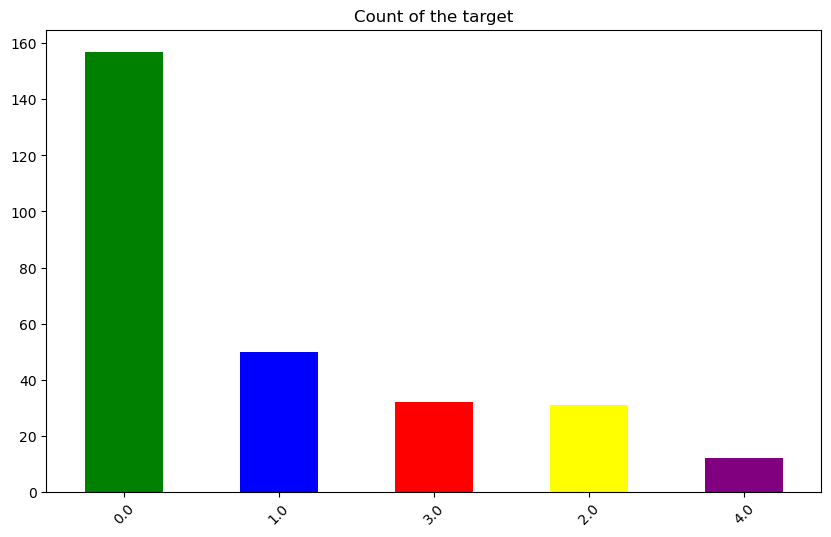

In [37]:
df_selected_copy["target"].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("Count of the target")
plt.xticks(rotation=45);

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
#panggil smote
smote = RandomOverSampler(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

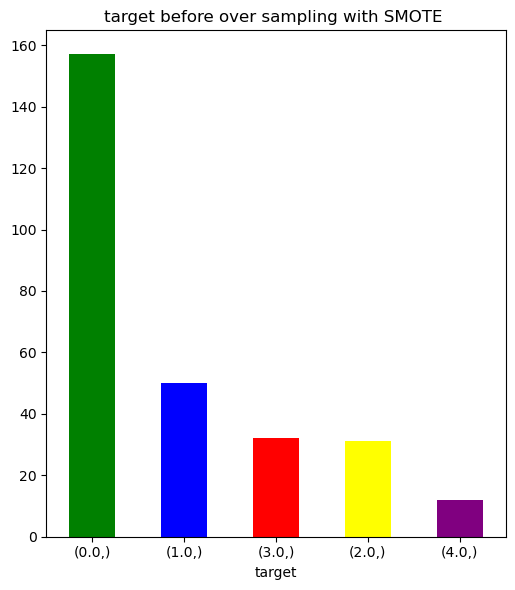

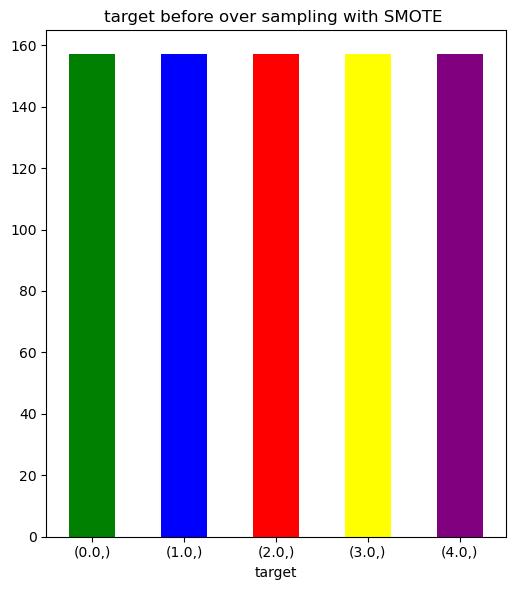

In [41]:
#visualisasi bingkai perbandingan no smote vs SMOTE
plt.figure(figsize=(12,8))

#mempersiapkan data visualisasi no smote dan smote
no_smote_y = pd.DataFrame(data=y)
smote_y = pd.DataFrame(data=y_smote_resampled)

#membuat visulasisi untu no smote
plt.subplot(1, 2, 1)
no_smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

#membuat visulisasi smote
plt.subplot(1,2,1)
smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()


In [42]:
smote_y["target"].value_counts()

0.0    157
2.0    157
1.0    157
3.0    157
4.0    157
Name: target, dtype: int64

# Outlier

In [43]:
# sns.boxplot(df_selected_copy)

# Normalisasi

In [44]:
df_selected_copy.describe()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,1.014184,149.765957,0.326241,1.026950,1.585106,4.678571,0.907801
std,9.053083,0.468338,0.955405,17.757496,0.998118,22.923869,0.469670,1.138825,0.609700,1.932188,1.224894
min,29.000000,0.000000,1.000000,94.000000,0.000000,71.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,133.250000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,2.000000,153.500000,0.000000,0.800000,2.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,2.000000,165.750000,1.000000,1.600000,2.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,2.000000,202.000000,1.000000,6.200000,3.000000,7.000000,4.000000


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normalisasi = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normalisasi)

dfcek1 = pd.DataFrame(X_smote_resampled_normalisasi)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.00000,785.000000,785.000000,785.000000
mean,0.564782,0.777070,0.836093,0.382923,0.592994,0.538737,0.49172,0.252168,0.408917,0.629436
std,0.183021,0.416477,0.279748,0.179340,0.489965,0.175129,0.50025,0.202374,0.291761,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.458333,1.000000,0.666667,0.245283,0.000000,0.412214,0.00000,0.096774,0.000000,0.000000
50%,0.583333,1.000000,1.000000,0.358491,1.000000,0.541985,0.00000,0.225806,0.500000,1.000000
75%,0.687500,1.000000,1.000000,0.481132,1.000000,0.679389,1.00000,0.403226,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


<Axes: >

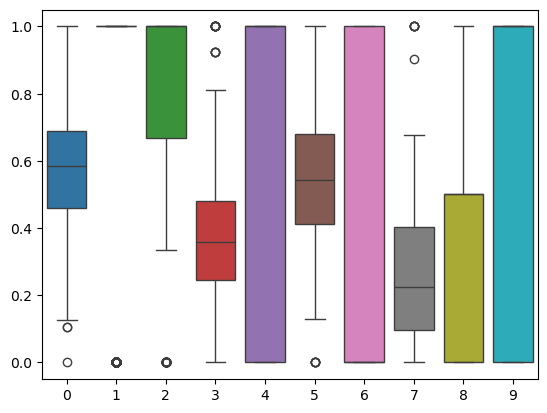

In [46]:
sns.boxplot(X_smote_resampled_normalisasi)

In [ ]:
#menampilkan pair plot
import seaborn as sns

gabungan_series = pd.concat([dfcek1, y_smote_resampled], axis=1)

# Membuat pair plot menggunakan seaborn
sns.pairplot(gabungan_series, hue='target')
plt.show()

# spliting data

In [ ]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normalisasi, X_test_normalisasi, y_train_normalisasi, y_test_normalisasi = train_test_split(X_smote_resampled_normalisasi, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }
    
    return print(metric_dict)

# OVersampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Knn
KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

In [ ]:
evaluation(y_test,y_pred_knn)

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#RF
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

evaluation(y_test,y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#xgbost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

evaluation(y_test,y_pred_xgb)

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Iversampling dan di normalisasi

In [ ]:
#knn 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_knn = knn_model.predict(X_test_normalisasi)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normalisasi = round(accuracy_score(y_test_normalisasi,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normalisasi)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_knn))

In [ ]:
evaluation(y_test_normalisasi,y_pred_knn)

In [ ]:
cm = confusion_matrix(y_test_normalisasi, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#rf
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_rf = rf_model.predict(X_test_normalisasi)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normalisasi = round(accuracy_score(y_test_normalisasi, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normalisasi )
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_rf))

evaluation(y_test_normalisasi,y_pred_rf)

cm = confusion_matrix(y_test_normalisasi, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#xgboost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_xgb = xgb_model.predict(X_test_normalisasi)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normalisasi = round(accuracy_score(y_test_normalisasi, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normalisasi)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_xgb))

evaluation(y_test_normalisasi,y_pred_xgb)

cm = confusion_matrix(y_test_normalisasi, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Tuning Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
y_pred_knn = knn_model.predict(X_test_normalisasi)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normalisasi,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun*100)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_knn))

In [ ]:
cm = confusion_matrix(y_test_normalisasi, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#rf
rf_model = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1,random_state=42)
rf_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

y_pred_rf = rf_model.predict(X_test_normalisasi)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normalisasi, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_rf))

evaluation(y_test_normalisasi,y_pred_rf)

In [ ]:
cm = confusion_matrix(y_test_normalisasi, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
#xgboost
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

y_pred_xgb = xgb_model.predict(X_test_normalisasi)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normalisasi, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_xgb))

evaluation(y_test_normalisasi,y_pred_xgb)

cm = confusion_matrix(y_test_normalisasi, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
# Evaluasi

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote*100,
                                         accuracy_rf_smote*100,
                                         accuracy_xgb_smote*100]})
model_comp1.head()

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normalisasi*100,
                                         accuracy_rf_smote_normalisasi*100,
                                         accuracy_xgb_smote_normalisasi*100]})

model_comp2.head()

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                         accuracy_rf_smote_normal_Tun*100,
                                         accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normalisasi*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()